# Plot Training metrics

In [2]:
import supervisely_lib as sly

import os

%matplotlib inline
import matplotlib.pyplot as plt

## Configuration
Edit the following settings for your own case

In [3]:
team_name = "jupyter_tutorials"
workspace_name = "metrics_tutorials"

model_names = ['SSD MobileNet v2 lemons']

metric_name = 'loss'

## Verify input values

In [4]:
address = os.environ['SERVER_ADDRESS']
token = os.environ['API_TOKEN']
api = sly.Api(address, token)

team = api.team.get_info_by_name(team_name)
if team is None:
    raise RuntimeError(f'Team {team_name!r} not found')

workspace = api.workspace.get_info_by_name(team.id, workspace_name)
if workspace is None:
    raise RuntimeError(f'Workspace {workspace_name!r} not found')

model_infos = [api.model.get_info_by_name(workspace.id, model_name) for model_name in model_names]
for model_name, model_info in zip(model_names, model_infos):
    if model_info is None:
        raise RuntimeError(f'Model {model_name!r} not found.')

## Plot training metrics

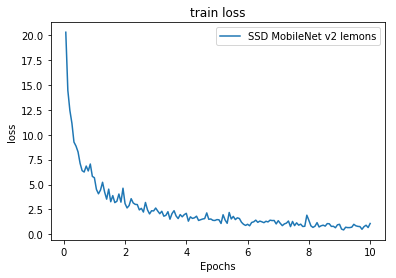

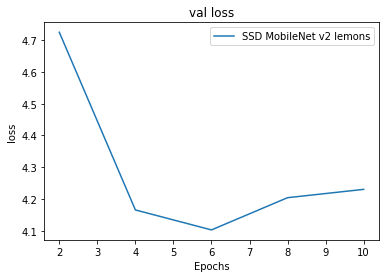

In [5]:
raw_metrics = [api.model.get_training_metrics(model_id=model_info.id) for model_info in model_infos]
for raw_model_metrics, model_info in zip(raw_metrics, model_infos):
    if raw_model_metrics is None:
        sly.logger.warn(f'Training metris for model {model_info.name!r} not found.')
raw_metrics = [r if r is not None else [] for r in raw_metrics]

def _do_plot(metric_type):
    train_fig = plt.figure()
    plt.title(f'{metric_type} {metric_name}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    for model_name, model_raw_metrics in zip(model_names, raw_metrics):
        metric_tuples = [(float(r['epoch']), float(r['metrics'][metric_name]))
                         for r in model_raw_metrics
                         if r['type'] == metric_type and metric_name in r['metrics']]
        if len(metric_tuples) > 0:
            epochs, values = zip(*metric_tuples)
            plt.plot(epochs, values, label=model_name)
    plt.legend()

_do_plot('train')
_do_plot('val')